# Exercice : Préparation et Modélisation des Données

## Objectif
Vous allez travailler sur un sous-ensemble de données contenant **100 colonnes sélectionnées semi-aléatoirement**, ainsi que la colonne `winner`. Votre objectif est de préparer les données, de réduire leur dimensionnalité, et d'appliquer des modèles de classification et de régression.

## Étapes

1. **Sélection de colonnes** :
   - Sélectionnez **100 colonnes aléatoires** parmi les colonnes du DataFrame, en plus de la colonne `winner`, qui sera votre variable cible.
   - Créez un DataFrame avec ces colonnes.

2. **Préparation des données** :
   - **Nettoyage** :
     - Identifiez les valeurs manquantes dans chaque colonne.
     - Remplacez les valeurs manquantes par la moyenne pour les colonnes numériques, et par la modalité (valeur la plus fréquente) pour les colonnes catégorielles.
   - **Transformation** :
     - Standardisez les colonnes numériques (moyenne = 0, écart-type = 1).
     - Identifier la colonne catégorielle avec le moins de valeurs uniques (c'est-à-dire, la moins fréquente), et appliquer un Label Encoding uniquement à cette colonne.
     - pour les autres  colonnes catégorielles Appliquez un encodage one-hot aux(à l'exception de la colonne `winner`).
   - Vérifiez que toutes les colonnes ont été transformées correctement et que les données sont prêtes pour la modélisation.

3. **Réduction de la dimensionnalité** :
   - **Analyse de corrélation** :
     - Calculez la matrice de corrélation pour les colonnes numériques du DataFrame.
     - Identifiez les colonnes qui sont fortement corrélées (par exemple, avec un coefficient de corrélation supérieur à 0,8).
     - Supprimez les colonnes fortement corrélées pour éviter la redondance dans les données.
   - **Sélection de caractéristiques** :
     - Appliquez une méthode de sélection de caractéristiques (par exemple, `SelectKBest` avec `chi2` pour la classification) pour ne garder que les **10 meilleures caractéristiques**.
   - **PCA** :
     - Appliquez une analyse en composantes principales (PCA) pour réduire encore la dimensionnalité des données et ne garder que **3 composantes principales**.

4. **Modélisation** :

Dans cette section, vous allez appliquer deux types de modèles (classification et régression) pour prédire la variable cible winner. Les étapes seront réalisées d'abord sur **les données avant réduction de dimensionnalité**, puis sur **les données après réduction de dimensionnalité**.
   - **Classification** :
     - Utilisez un algorithme de classification (par exemple, `RandomForestClassifier`) pour prédire la variable cible `winner`.
     - Entraînez le modèle, puis évaluez ses performances (précision, rappel, F1-score) sur un ensemble de test.
   - **Régression** :
     - Transformez la variable `winner` en une variable numérique si elle est catégorielle.
     - Utilisez un algorithme de régression (par exemple, `LinearRegression`) pour prédire `winner`.
     - Entraînez le modèle de régression et évaluez ses performances (MSE, RMSE, MAE) sur l'ensemble de test.



In [2]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 4.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.8 MB/s eta 0:00:00-:--:--


In [1]:
#!pip install "xlrd>=2.0.1"
#!pip install openpyxl
#!pip install pyxlsb

In [2]:
import requests

url = "https://raw.githubusercontent.com/linogaliana/python-datascientist/main/content/modelisation/get_data.py"
r = requests.get(url, allow_redirects=True)
open("getdata.py", "wb").write(r.content)

import getdata

votes = getdata.create_votes_dataframes()
votes

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,share_2008_democrat,share_2008_other,share_2008_republican,share_2012_democrat,share_2012_other,share_2012_republican,share_2016_democrat,share_2016_other,share_2016_republican,winner
0,29,227,00758566,0500000US29227,29227,Worth,06,690564983,493903,"POLYGON ((-94.63203 40.57176, -94.53388 40.570...",...,0.363714,0.034072,0.602215,0.325382,0.041031,0.633588,0.186424,0.041109,0.772467,republican
1,31,061,00835852,0500000US31061,31061,Franklin,06,1491355860,487899,"POLYGON ((-99.1794 40.35068, -98.72683 40.3504...",...,0.284794,0.019974,0.695232,0.250000,0.026042,0.723958,0.149432,0.045427,0.805140,republican
2,36,013,00974105,0500000US36013,36013,Chautauqua,06,2746047476,1139407865,"POLYGON ((-79.76195 42.26986, -79.62748 42.324...",...,0.495627,0.018104,0.486269,0.425017,0.115852,0.459131,0.352012,0.065439,0.582550,republican
3,37,181,01008591,0500000US37181,37181,Vance,06,653713542,42178610,"POLYGON ((-78.49773 36.51467, -78.45728 36.541...",...,0.630827,0.004743,0.364429,0.638870,0.004891,0.356239,0.612154,0.020824,0.367022,democrats
4,47,183,01639799,0500000US47183,47183,Weakley,06,1503107848,3707114,"POLYGON ((-88.94916 36.4101, -88.81642 36.4107...",...,0.335720,0.017458,0.646822,0.287590,0.014914,0.697495,0.227511,0.033158,0.739330,republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,40,091,01101836,0500000US40091,40091,McIntosh,06,1601359179,242867678,"POLYGON ((-95.98151 35.28978, -95.98146 35.376...",...,0.403746,0.000000,0.596254,0.381312,0.000000,0.618688,0.266608,0.042070,0.691322,republican
3103,40,095,01101832,0500000US40095,40095,Marshall,06,962443215,143430766,"POLYGON ((-96.96842 34.17268, -96.9335 34.1727...",...,0.305788,0.000000,0.694212,0.271595,0.000000,0.728405,0.199563,0.034596,0.765841,republican
3104,48,225,01383898,0500000US48225,48225,Houston,06,3188278910,14435337,"POLYGON ((-95.7287 31.16406, -95.72523 31.2710...",...,0.307978,0.011132,0.680891,0.275749,0.008400,0.715851,0.236801,0.020352,0.742847,republican
3105,48,407,01383989,0500000US48407,48407,San Jacinto,06,1474332268,151949233,"POLYGON ((-95.32748 30.85955, -95.25238 30.906...",...,0.303751,0.009600,0.686649,0.250624,0.010295,0.739081,0.197041,0.023784,0.779174,republican


In [3]:
# Aperçu  et informations utiles des données
votes.info()
votes.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Columns: 383 entries, STATEFP to winner
dtypes: float64(357), geometry(1), int64(7), object(18)
memory usage: 9.1+ MB


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,share_2008_democrat,share_2008_other,share_2008_republican,share_2012_democrat,share_2012_other,share_2012_republican,share_2016_democrat,share_2016_other,share_2016_republican,winner
0,29,227,00758566,0500000US29227,29227,Worth,06,690564983,493903,"POLYGON ((-94.63203 40.57176, -94.53388 40.570...",...,0.363714,0.034072,0.602215,0.325382,0.041031,0.633588,0.186424,0.041109,0.772467,republican
1,31,061,00835852,0500000US31061,31061,Franklin,06,1491355860,487899,"POLYGON ((-99.1794 40.35068, -98.72683 40.3504...",...,0.284794,0.019974,0.695232,0.250000,0.026042,0.723958,0.149432,0.045427,0.805140,republican
2,36,013,00974105,0500000US36013,36013,Chautauqua,06,2746047476,1139407865,"POLYGON ((-79.76195 42.26986, -79.62748 42.324...",...,0.495627,0.018104,0.486269,0.425017,0.115852,0.459131,0.352012,0.065439,0.582550,republican
3,37,181,01008591,0500000US37181,37181,Vance,06,653713542,42178610,"POLYGON ((-78.49773 36.51467, -78.45728 36.541...",...,0.630827,0.004743,0.364429,0.638870,0.004891,0.356239,0.612154,0.020824,0.367022,democrats
4,47,183,01639799,0500000US47183,47183,Weakley,06,1503107848,3707114,"POLYGON ((-88.94916 36.4101, -88.81642 36.4107...",...,0.335720,0.017458,0.646822,0.287590,0.014914,0.697495,0.227511,0.033158,0.739330,republican


1-Sélection de colonnes 

In [4]:

#Sélectionnez 100 colonnes aléatoires parmi les colonnes du DataFrame, en plus de la colonne winner, qui sera votre variable cible.
#Créez un DataFrame avec ces colonnes.

import numpy as np
#Initiation de la selection au hasard
np.random.seed(42)

# Sélection de 100 colonnes aléatoires en laintenant  "winner" à l'écart
colonne_select = np.random.choice(
    votes.drop(columns=['winner']).columns, 100, replace=False
).tolist()

# Ajout de  la colonne "winner" à la liste des colonnes sélectionnées
colonne_select.append('winner')

# DataFrame des colonnes
df_colonn_select = votes[colonne_select]
df_colonn_select

,Employed_2011,Employed_2003,"Bachelor's degree or higher, 2000",CI90UBALLP_2019,Births_2015,share_2004_democrat,POP_ESTIMATE_2012,RESIDUAL_2013,share_2008_democrat,Unemployed_2000,...,total_votes,Deaths_2015,Unemployed_2003,ALAND,per_dem,Civilian_labor_force_2005,CI90LB517P_2019,CI90LB017P_2019,NET_MIG_2010,winner
0,1170.0,1178.0,186.0,18.4,27.0,0.385159,2080.0,0.0,0.363714,46.0,...,1107,33.0,48.0,690564983,0.194219,1144.0,12.9,14.4,-14.0,republican
1,1601.0,1908.0,401.0,17.4,24.0,0.240373,3183.0,0.0,0.284794,49.0,...,1728,40.0,63.0,1491355860,0.159722,1893.0,11.7,13.8,16.0,republican
2,56616.0,62909.0,15461.0,18.8,1422.0,0.432690,133304.0,-1.0,0.495627,2747.0,...,59304,1479.0,3826.0,2746047476,0.389299,67149.0,17.9,18.7,-89.0,republican
3,15867.0,17822.0,2935.0,22.7,547.0,0.558908,45093.0,10.0,0.630827,1364.0,...,20999,491.0,2127.0,653713542,0.591981,18976.0,18.6,21.7,-124.0,democrats
4,14806.0,15184.0,3361.0,21.4,354.0,0.413906,34554.0,4.0,0.335720,818.0,...,13735,384.0,1354.0,1503107848,0.219876,15305.0,13.7,16.9,-18.0,republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,6611.0,7627.0,1805.0,24.0,201.0,0.488889,20197.0,-5.0,0.403746,358.0,...,8335,299.0,618.0,1601359179,0.243671,8398.0,18.6,19.9,52.0,republican
3103,6285.0,5636.0,1039.0,21.1,176.0,0.383049,16020.0,0.0,0.305788,209.0,...,6064,219.0,289.0,962443215,0.181398,6110.0,17.4,17.6,32.0,republican
3104,9830.0,9117.0,1989.0,26.0,219.0,0.331706,23213.0,4.0,0.307978,463.0,...,9437,279.0,701.0,3188278910,0.245205,8494.0,16.0,19.9,6.0,republican
3105,10270.0,9252.0,1438.0,20.8,278.0,0.330831,26942.0,-6.0,0.303751,436.0,...,12638,301.0,679.0,1474332268,0.184918,10161.0,16.4,17.8,63.0,republican


2-Préparation des données :

In [5]:
#Import des bibliothèques nécessaires
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#Préparation des données :
#
#Nettoyage :
#Identifiez les valeurs manquantes dans chaque colonne.
#Remplacez les valeurs manquantes par la moyenne pour les colonnes numériques, et par la modalité (valeur la plus fréquente) pour les colonnes catégorielles.



import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Suppression des doublons de colonnes
df_colonn_select = df_colonn_select.loc[:, ~df_colonn_select.columns.duplicated()]

# Vérification des valeurs manquantes avant remplissage
print("Colonnes avec valeurs manquantes avant remplissage :")
missing_values = df_colonn_select.isnull().sum()
print(missing_values[missing_values > 0])



Colonnes avec valeurs manquantes avant remplissage :
Bachelor's degree or higher, 2000                                1
Four years of college or higher, 1970                            6
share_2000_other                                                 1
candidatevotes_2000_republican                                   1
Some college or associate's degree, 1990                         1
Unemployed_2006                                                  7
candidatevotes_2000_other                                        1
Percent of adults with less than a high school diploma, 2000     1
share_2004_other                                                77
Percent of adults with less than a high school diploma, 1980     3
Civilian_labor_force_2005                                        7
dtype: int64


In [6]:
#  Exclusion des colonnes géométriques avant traitement
non_geometry_columns = df_colonn_select.select_dtypes(exclude=['geometry']).columns

# Création d'un DataFrame sans colonnes géométriques
df_non_geo = df_colonn_select[non_geometry_columns]

# Affichage des colonnes avant transformation
print("Colonnes avant transformation :", df_non_geo.columns)

# Remplissage des valeurs manquantes
for column in df_non_geo.columns:
    if pd.api.types.is_numeric_dtype(df_non_geo[column]):  # Colonnes numériques
        # Remplir les NaN avec la moyenne de la colonne
        df_non_geo.loc[:, column] = df_non_geo[column].fillna(df_non_geo[column].mean())
    else:  # Colonnes catégorielles
        # Vérification du mode de la colonne avant de remplir les NaN
        mode_value = df_non_geo[column].mode()
        if not mode_value.empty:
            # Remplacer les NaN par la première valeur du mode
            df_non_geo.loc[:, column] = df_non_geo[column].fillna(mode_value.iloc[0])
        else:
            # Si le mode est vide, remplissons par une valeur par défaut
            df_non_geo.loc[:, column] = df_non_geo[column].fillna("Unknown")

#-Transformation :
#Standardisez les colonnes numériques (moyenne = 0, écart-type = 1).
#Identifier la colonne catégorielle avec le moins de valeurs uniques (c'est-à-dire, la moins fréquente), et appliquer un Label Encoding uniquement à cette colonne.
#pour les autres colonnes catégorielles Appliquez un encodage one-hot aux(à l'exception de la colonne winner).
#Vérifiez que toutes les colonnes ont été transformées correctement et que les données sont prêtes pour la modélisation.

# 3. Standardisation des colonnes numériques
numeric_columns = df_non_geo.select_dtypes(include='number').columns
scaler = StandardScaler()
df_non_geo.loc[:, numeric_columns] = scaler.fit_transform(df_non_geo[numeric_columns])

# 4. Transformation des colonnes catégorielles
categorical_columns = df_non_geo.select_dtypes(include=['object', 'category']).columns
print("Colonnes catégorielles avant transformation :", categorical_columns)

# Vérification si des colonnes catégorielles existent avant de continuer
if categorical_columns.empty:
    print("Aucune colonne catégorielle dans les données.")
else:
    # Identification de  colonne catégorielle avec le moins de valeurs uniques
    # Eviter les erreurs si certaines colonnes sont vides
    unique_counts = df_non_geo[categorical_columns].nunique()
    
    # Filtre des colonnes avec des valeurs uniques non nulles
    valid_columns = unique_counts[unique_counts > 0]
    
    if valid_columns.empty:
        print("Aucune colonne catégorielle avec des valeurs uniques non nulles.")
    else:
        # Identification de  colonne avec le moins de valeurs uniques
        least_unique_column = valid_columns.idxmin()
        print("Colonne avec le moins de valeurs uniques :", least_unique_column)
        
        #  Encoding sur cette colonne
        label_encoder = LabelEncoder()
        df_non_geo.loc[:, least_unique_column] = label_encoder.fit_transform(df_non_geo[least_unique_column])

        # 5. Encodage One-Hot pour les autres colonnes catégorielles (sauf 'winner' et la colonne avec le moins de valeurs uniques)
        one_hot_columns = [col for col in categorical_columns if col not in ['winner', least_unique_column]]
        print("Colonnes avec encodage One-Hot :", one_hot_columns)

        # Encodage One-Hot aux colonnes sélectionnées
        df_non_geo = pd.get_dummies(df_non_geo, columns=one_hot_columns, drop_first=True)

# 6. Réintégration  des colonnes géométriques à la fin
df_final = pd.concat([df_non_geo, df_colonn_select[['geometry']]], axis=1)

# Vérification finale de la structure du DataFrame après transformation
print("Structure après transformation :")
df_final.info()

df_final.head()




Colonnes avant transformation : Index(['Employed_2011', 'Employed_2003', 'Bachelor's degree or higher, 2000',
       'CI90UBALLP_2019', 'Births_2015', 'share_2004_democrat',
       'POP_ESTIMATE_2012', 'RESIDUAL_2013', 'share_2008_democrat',
       'Unemployed_2000', 'candidatevotes_2012_republican', 'RESIDUAL_2017',
       'Four years of college or higher, 1970', 'Unemployment_rate_2012',
       'NET_MIG_2019', 'R_DOMESTIC_MIG_2018', 'R_NATURAL_INC_2013',
       'candidatevotes_2008_other', 'candidatevotes_2016_republican',
       'Unemployed_2002', 'N_POP_CHG_2011', 'POP_ESTIMATE_2018',
       'DOMESTIC_MIG_2012', 'votes_dem', 'Births_2014', 'R_death_2015',
       'Metro_2013', 'STATEFP', 'Unemployment_rate_2001', 'NET_MIG_2017',
       'Rural-urban_Continuum Code_2013', 'CI90LBALL_2019', 'NATURAL_INC_2017',
       'R_birth_2016', 'share_2000_other', 'R_NET_MIG_2015', 'N_POP_CHG_2015',
       'candidatevotes_2000_republican', 'Unemployment_rate_2014',
       'INTERNATIONAL_MIG_2011',

,Employed_2011,Employed_2003,"Bachelor's degree or higher, 2000",CI90UBALLP_2019,Births_2015,share_2004_democrat,POP_ESTIMATE_2012,RESIDUAL_2013,share_2008_democrat,Unemployed_2000,...,Area_Name_Yoakum County,Area_Name_Yolo County,Area_Name_York County,Area_Name_Young County,Area_Name_Yuba County,Area_Name_Yuma County,Area_Name_Zapata County,Area_Name_Zavala County,Area_Name_Ziebach County,geometry
0,-0.305900,-0.304005,-0.265895,0.144776,-0.286839,-0.012981,-0.306433,-0.001328,-0.371017,-0.261926,...,False,False,False,False,False,False,False,False,False,"POLYGON ((-94.63203 40.57176, -94.53388 40.570..."
1,-0.302892,-0.298797,-0.261820,0.001353,-0.287529,-1.175712,-0.302993,-0.001328,-0.942189,-0.261483,...,False,False,False,False,False,False,False,False,False,"POLYGON ((-99.1794 40.35068, -98.72683 40.3504..."
2,0.081088,0.136395,0.023580,0.202146,0.033697,0.368728,0.102888,-0.027614,0.583687,0.137165,...,False,False,False,False,False,False,False,False,False,"POLYGON ((-79.76195 42.26986, -79.62748 42.324..."
3,-0.203322,-0.185264,-0.213799,0.761499,-0.167356,1.382347,-0.172265,0.261533,1.562179,-0.067182,...,False,False,False,False,False,False,False,False,False,"POLYGON ((-78.49773 36.51467, -78.45728 36.541..."
4,-0.210727,-0.204084,-0.205726,0.575048,-0.211703,0.217875,-0.205139,0.103816,-0.573621,-0.147858,...,False,False,False,False,False,False,False,False,False,"POLYGON ((-88.94916 36.4101, -88.81642 36.4107..."


3-Réduction de la dimensionnalité :

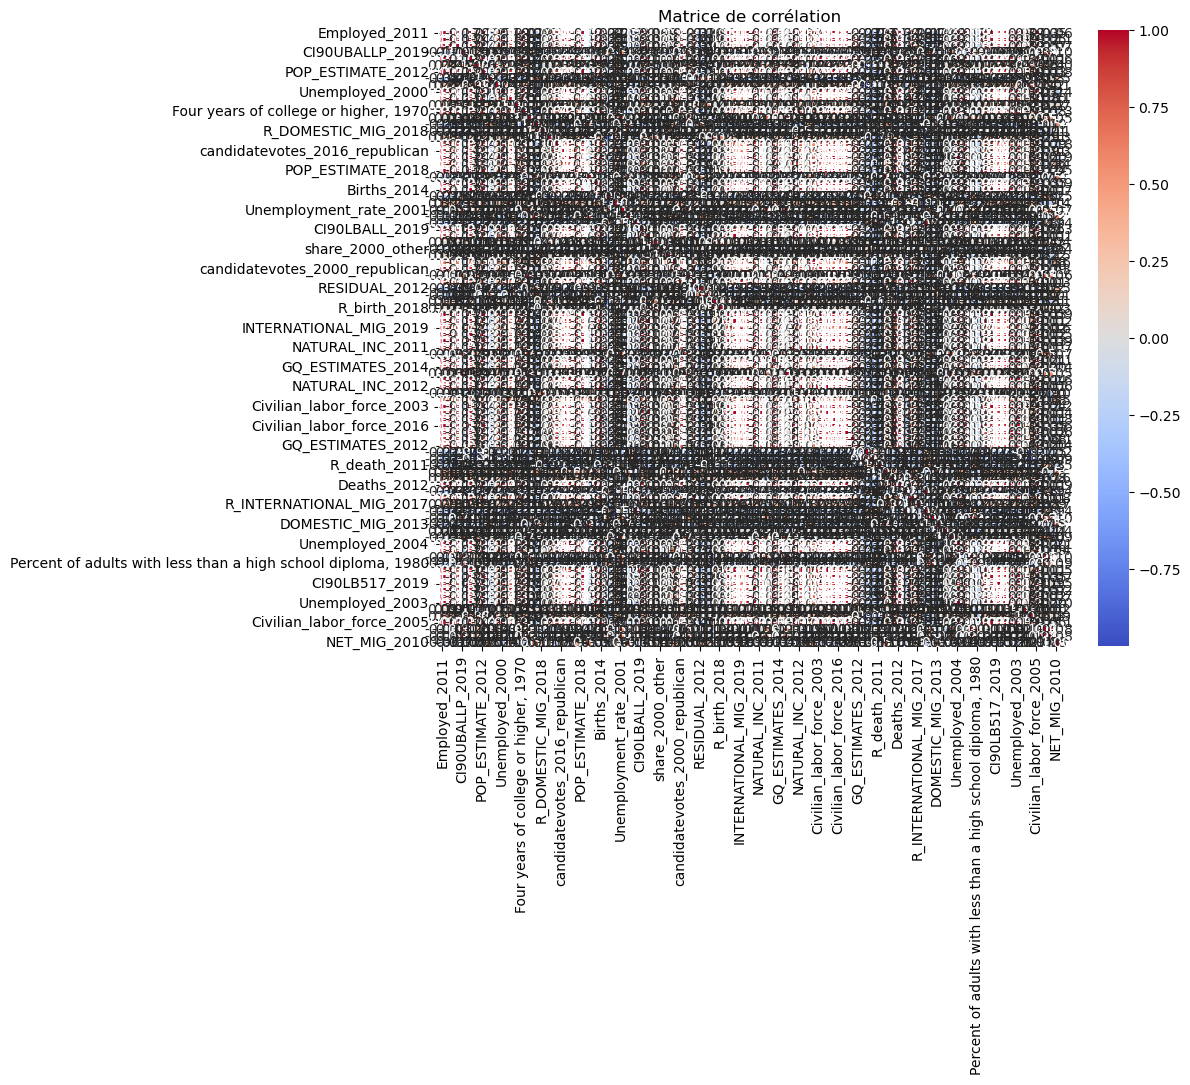

Paires de colonnes fortement corrélées (corr > 0.8):
POP_ESTIMATE_2010               ESTIMATES_BASE_2010               0.999998
ESTIMATES_BASE_2010             POP_ESTIMATE_2010                 0.999998
POP_ESTIMATE_2012               POP_ESTIMATE_2010                 0.999915
POP_ESTIMATE_2010               POP_ESTIMATE_2012                 0.999915
Civilian_labor_force_2003       Employed_2003                     0.999910
                                                                    ...   
Civilian_labor_force_2005       N_POP_CHG_2011                    0.800876
candidatevotes_2008_other       NATURAL_INC_2015                  0.800824
NATURAL_INC_2015                candidatevotes_2008_other         0.800824
                                candidatevotes_2012_republican    0.800786
candidatevotes_2012_republican  NATURAL_INC_2015                  0.800786
Length: 1978, dtype: float64


In [7]:

#Analyse de corrélation :
#Calculez la matrice de corrélation pour les colonnes numériques du DataFrame.
#Identifiez les colonnes qui sont fortement corrélées (par exemple, avec un coefficient de corrélation supérieur à 0,8).
#Supprimez les colonnes fortement corrélées pour éviter la redondance dans les données.




#Importation des bibliotheques

import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
correlation_matrix = df_colonn_select[numeric_columns].corr()
# Affichage de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

# Identification des colonnes fortement corrélées (correlation > 0.8)
threshold = 0.8
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
strongly_corr_pairs = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]
print("Paires de colonnes fortement corrélées (corr > 0.8):")
print(strongly_corr_pairs)

# Identification  les colonnes à supprimer
to_drop = set()
for col1 in strongly_corr_pairs.index.get_level_values(0):
    for col2 in strongly_corr_pairs.index.get_level_values(1):
        if col1 != col2:
            if col1 not in to_drop:
                to_drop.add(col2)

# Suppression  des colonnes
df_colonn_select = df_colonn_select.drop(columns=to_drop)

In [11]:
#Sélection de caractéristiques :
#Appliquez une méthode de sélection de caractéristiques (par exemple, SelectKBest avec chi2 pour la classification) pour ne garder que les 10 meilleures caractéristiques.
#PCA :Appliquez une analyse en composantes principales (PCA) pour réduire encore la dimensionnalité des données et ne garder que 3 composantes principales.


# Importation des bibliothèques nécessaires
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer



# Exclusion des colonnes non numériques
df_non_geo = df_colonn_select.select_dtypes(include=['number'])

#  Séparation des caractéristiques (X) et la cible (y)
X = df_non_geo.drop(columns=['winner'], errors='ignore')
y = df_colonn_select['winner']

# Gestion  des valeurs manquantes
# Imputation des NaN avec la médiane des colonnes
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Ajout d'une constante pour rendre les données non négatives (nécessaire pour chi2)
X_imputed = X_imputed - X_imputed.min(axis=0)

# Sélection des 10 meilleures caractéristiques avec SelectKBest (chi2)
selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X_imputed, y)

# Récupération des noms des colonnes sélectionnées
selected_features = X.columns[selector.get_support()]
print("Les 10 meilleures caractéristiques sélectionnées :")
print(selected_features)

#  Réduction de la dimensionnalité avec PCA à 3 composantes principales
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_selected)

# Affichage des données après réduction
print("Données après réduction à 3 composantes principales :")
print(X_pca)


Les 10 meilleures caractéristiques sélectionnées :
Index(['R_DOMESTIC_MIG_2018', 'Metro_2013', 'Rural-urban_Continuum Code_2013',
       'RESIDUAL_2012', 'POP_ESTIMATE_2010', 'R_DOMESTIC_MIG_2019',
       'Rural_urban_continuum_code_2013', 'Rural-urban_Continuum_Code_2013',
       'ALAND', 'NET_MIG_2010'],
      dtype='object')
Données après réduction à 3 composantes principales :
[[-1.77147474e+09 -7.88978768e+04 -7.60225503e+01]
 [-9.70683865e+08 -8.58673946e+04 -4.94243762e+01]
 [ 2.84007752e+08  3.29827136e+04 -1.39209027e+02]
 ...
 [ 7.26239185e+08 -8.25122151e+04 -6.38207020e+01]
 [-9.87707457e+08 -6.24660265e+04  1.18991546e+00]
 [-2.47320418e+08 -7.98384434e+04 -1.01430420e+02]]


In [15]:
#Importation des bibliotheques necessaires
from sklearn.decomposition import PCA

#  Remplacement des valeurs manquantes
X_imputed = SimpleImputer(strategy='median').fit_transform(X)

# Ajout d'une constante pour rendre les données non négatives
X_imputed = X_imputed - X_imputed.min(axis=0)

#  Sélection des 10 meilleures caractéristiques avec SelectKBest
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X_imputed, y)

# Application de PCA pour réduire les dimensions à 3 composantes principales
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_new)

# Affichage des résultats
print("Variance expliquée par chaque composante principale :", pca.explained_variance_ratio_)
print("Composantes principales :\n", pca.components_)

Variance expliquée par chaque composante principale : [9.99999991e-01 8.58748091e-09 2.47793312e-14]
Composantes principales :
 [[ 1.06028676e-10 -1.16754384e-11  6.19690797e-11 -1.93607013e-10
   1.00669401e-05  1.61396653e-10  6.19690797e-11  6.19690797e-11
   1.00000000e+00  2.93320017e-09]
 [-4.85046142e-07  4.96218848e-07 -2.98914811e-06 -6.66887408e-05
   9.99999986e-01 -3.10348381e-07 -2.98914811e-06 -2.98914811e-06
  -1.00669395e-05 -1.51321462e-04]
 [ 2.33342719e-03  1.56721335e-04 -8.79099322e-04  3.20619584e-02
   1.53374728e-04  2.38098872e-03 -8.79099320e-04 -8.79099320e-04
  -4.46994559e-09  9.99479140e-01]]


4-Modélisation :



In [17]:
#Classification :
#Utilisez un algorithme de classification (par exemple, RandomForestClassifier) pour prédire la variable cible winner.
#Entraînez le modèle, puis évaluez ses performances (précision, rappel, F1-score) sur un ensemble de test.

#algorithme de classification

#Importation des bibliotheques necessaires
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

# Sélection des caractéristiques (X) et de la cible (y)
X = df_non_geo.drop(columns=['winner'], errors='ignore')  
y = df_colonn_select['winner']  # Cible

# Division des données en ensemble d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classificateur RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')  # Correction de l'appel
f1 = f1_score(y_test, y_pred, average='weighted')

# Afficher les résultats de l'évaluation
print("Classification avant réduction de dimensionnalité :")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")  # Correction ici
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Classification avant réduction de dimensionnalité :
Accuracy: 0.9051
Recall: 0.9051
F1-Score: 0.8969

Classification Report:
              precision    recall  f1-score   support

   democrats       0.82      0.54      0.65       102
  republican       0.92      0.98      0.95       520

    accuracy                           0.91       622
   macro avg       0.87      0.76      0.80       622
weighted avg       0.90      0.91      0.90       622



In [18]:
# Division  des données transformées (après PCA) en ensemble d'entraînement (80%) et de test (20%)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#  classificateur RandomForest
clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînemet du  modèle avec les données après PCA
clf_pca.fit(X_train_pca, y_train_pca)

# Prédiction sur  l'ensemble de test
y_pred_pca = clf_pca.predict(X_test_pca)

# Évaluation  du modèle après PCA
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
recall_pca = recall_score(y_test_pca, y_pred_pca, average='weighted')
f1_pca = f1_score(y_test_pca, y_pred_pca, average='weighted')

# Résultats de l'évaluation après PCA
print("Classification après réduction de dimensionnalité (PCA) :")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"Recall: {recall_pca:.4f}")
print(f"F1-Score: {f1_pca:.4f}")
print("\nClassification Report après PCA:")
print(classification_report(y_test_pca, y_pred_pca))


Classification après réduction de dimensionnalité (PCA) :
Accuracy: 0.8746
Recall: 0.8746
F1-Score: 0.8616

Classification Report après PCA:
              precision    recall  f1-score   support

   democrats       0.69      0.42      0.52       102
  republican       0.89      0.96      0.93       520

    accuracy                           0.87       622
   macro avg       0.79      0.69      0.73       622
weighted avg       0.86      0.87      0.86       622



In [23]:
#Régression 
#Transformez la variable winner en une variable numérique si elle est catégorielle.
#Utilisez un algorithme de régression (par exemple, LinearRegression) pour prédire winner.
#Entraînez le modèle de régression et évaluez ses performances (MSE, RMSE, MAE) sur l'ensemble de test.




# Transformation de la variable cible 'winner' en valeurs numériques (1 pour 'Yes', 0 pour 'No')
y = df_colonn_select['winner'].map({'Yes': 1, 'No': 0})

# Imputation des valeurs manquantes de 'y' par la valeur la plus fréquente (mode)
imputer_y = SimpleImputer(strategy='most_frequent')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()  # .ravel() pour convertir en array 1D

# Prétraitement des données en excluant les colonnes géométriques ou non numériques
df_non_geo = df_colonn_select.select_dtypes(include=['number'])  
X = df_non_geo.drop(columns=['winner'], errors='ignore')

# Imputation des valeurs manquantes dans X
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Division des données en ensemble d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Initialisation du modèle de régression linéaire
regressor = LinearRegression()

# Entraînement du modèle
regressor.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = regressor.predict(X_test)

# Calcul des métriques de performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Résultats de l'évaluation
print("Régression - Performance sur l'ensemble de test :")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [3107, 0]